In [140]:
import requests
import json
import pandas as pd
import matplotlib.pyplot as plt

# Reading Data From API

In [141]:
response_API = requests.get('https://coronavirus.m.pipedream.net/')
data = response_API.text
raw = json.loads(data)

raw = raw['rawData']
raw

[{'FIPS': '',
  'Admin2': '',
  'Province_State': '',
  'Country_Region': 'Afghanistan',
  'Last_Update': '2023-03-10 04:21:03',
  'Lat': '33.93911',
  'Long_': '67.709953',
  'Confirmed': '209451',
  'Deaths': '7896',
  'Recovered': '',
  'Active': '',
  'Combined_Key': 'Afghanistan',
  'Incident_Rate': '538.0424508714615',
  'Case_Fatality_Ratio': '3.76985547932452'},
 {'FIPS': '',
  'Admin2': '',
  'Province_State': '',
  'Country_Region': 'Albania',
  'Last_Update': '2023-03-10 04:21:03',
  'Lat': '41.1533',
  'Long_': '20.1683',
  'Confirmed': '334457',
  'Deaths': '3598',
  'Recovered': '',
  'Active': '',
  'Combined_Key': 'Albania',
  'Incident_Rate': '11621.96817012996',
  'Case_Fatality_Ratio': '1.075773567304616'},
 {'FIPS': '',
  'Admin2': '',
  'Province_State': '',
  'Country_Region': 'Algeria',
  'Last_Update': '2023-03-10 04:21:03',
  'Lat': '28.0339',
  'Long_': '1.6596',
  'Confirmed': '271496',
  'Deaths': '6881',
  'Recovered': '',
  'Active': '',
  'Combined_Key': 

In [142]:
rawdf = pd.json_normalize(raw) 
rawdf

,FIPS,Admin2,Province_State,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,Combined_Key,Incident_Rate,Case_Fatality_Ratio
0,,,,Afghanistan,2023-03-10 04:21:03,33.93911,67.709953,209451,7896,,,Afghanistan,538.0424508714615,3.76985547932452
1,,,,Albania,2023-03-10 04:21:03,41.1533,20.1683,334457,3598,,,Albania,11621.96817012996,1.075773567304616
2,,,,Algeria,2023-03-10 04:21:03,28.0339,1.6596,271496,6881,,,Algeria,619.132365905185,2.534475646050034
3,,,,Andorra,2023-03-10 04:21:03,42.5063,1.5218,47890,165,,,Andorra,61981.49226687375,0.34453956984756734
4,,,,Angola,2023-03-10 04:21:03,-11.2027,17.8739,105288,1933,,,Angola,320.35277020195906,1.835916723653218
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4011,,,,West Bank and Gaza,2023-03-10 04:21:03,31.9522,35.2332,703228,5708,,,West Bank and Gaza,13784.956960969268,0.8116855415313383
4012,,,,Winter Olympics 2022,2023-03-10 04:21:03,39.9042,116.4074,535,0,,,Winter Olympics 2022,,0.0
4013,,,,Yemen,2023-03-10 04:21:03,15.552727,48.516388,11945,2159,,,Yemen,40.04899354817252,18.07450816241105
4014,,,,Zambia,2023-03-10 04:21:03,-13.133897,27.849332,343135,4057,,,Zambia,1866.491629984319,1.1823334839057513


# Cleaning Data


In [143]:
rawdf['Country_Region'].unique()

array(['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola',
       'Antarctica', 'Antigua and Barbuda', 'Argentina', 'Armenia',
       'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain',
       'Bangladesh', 'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin',
       'Bhutan', 'Bolivia', 'Bosnia and Herzegovina', 'Botswana',
       'Brazil', 'Brunei', 'Bulgaria', 'Burkina Faso', 'Burma', 'Burundi',
       'Cabo Verde', 'Cambodia', 'Cameroon', 'Canada',
       'Central African Republic', 'Chad', 'Chile', 'China', 'Colombia',
       'Comoros', 'Congo (Brazzaville)', 'Congo (Kinshasa)', 'Costa Rica',
       "Cote d'Ivoire", 'Croatia', 'Cuba', 'Cyprus', 'Czechia', 'Denmark',
       'Diamond Princess', 'Djibouti', 'Dominica', 'Dominican Republic',
       'Ecuador', 'Egypt', 'El Salvador', 'Equatorial Guinea', 'Eritrea',
       'Estonia', 'Eswatini', 'Ethiopia', 'Fiji', 'Finland', 'France',
       'Gabon', 'Gambia', 'Georgia', 'Germany', 'Ghana', 'Greece',
       'Grenada', 'Gua

In [144]:
usadf = rawdf.loc[rawdf['Country_Region'] == 'US'].reset_index(drop=True)
usadf.head()

,FIPS,Admin2,Province_State,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,Combined_Key,Incident_Rate,Case_Fatality_Ratio
0,1001,Autauga,Alabama,US,2023-03-10 04:21:03,32.53952745,-86.64408227,19790,232,,,"Autauga, Alabama, US",35422.148239632,1.1723092470944922
1,1003,Baldwin,Alabama,US,2023-03-10 04:21:03,30.72774991,-87.72207058,69860,727,,,"Baldwin, Alabama, US",31294.516068340843,1.0406527340395075
2,1005,Barbour,Alabama,US,2023-03-10 04:21:03,31.868263,-85.3871286,7485,103,,,"Barbour, Alabama, US",30320.829620027547,1.3760855043420173
3,1007,Bibb,Alabama,US,2023-03-10 04:21:03,32.99642064,-87.1251146,8091,109,,,"Bibb, Alabama, US",36130.21345003126,1.3471758744283773
4,1009,Blount,Alabama,US,2023-03-10 04:21:03,33.98210918,-86.56790593,18704,261,,,"Blount, Alabama, US",32345.31179746135,1.3954234388366125


In [145]:
usadf.drop(columns=['FIPS', 'Admin2', 'Recovered', 'Active', 'Combined_Key', 'Country_Region'], inplace=True)
usadf.dropna(inplace=True)
usadf.head()

,Province_State,Last_Update,Lat,Long_,Confirmed,Deaths,Incident_Rate,Case_Fatality_Ratio
0,Alabama,2023-03-10 04:21:03,32.53952745,-86.64408227,19790,232,35422.148239632,1.1723092470944922
1,Alabama,2023-03-10 04:21:03,30.72774991,-87.72207058,69860,727,31294.516068340843,1.0406527340395075
2,Alabama,2023-03-10 04:21:03,31.868263,-85.3871286,7485,103,30320.829620027547,1.3760855043420173
3,Alabama,2023-03-10 04:21:03,32.99642064,-87.1251146,8091,109,36130.21345003126,1.3471758744283773
4,Alabama,2023-03-10 04:21:03,33.98210918,-86.56790593,18704,261,32345.31179746135,1.3954234388366125


In [146]:
usadf["Province_State"].unique()

array(['Alabama', 'Alaska', 'American Samoa', 'Arizona', 'Arkansas',
       'California', 'Colorado', 'Connecticut', 'Delaware',
       'Diamond Princess', 'District of Columbia', 'Florida', 'Georgia',
       'Grand Princess', 'Guam', 'Hawaii', 'Idaho', 'Illinois', 'Indiana',
       'Iowa', 'Kansas', 'Kentucky', 'Louisiana', 'Maine', 'Maryland',
       'Massachusetts', 'Michigan', 'Minnesota', 'Mississippi',
       'Missouri', 'Montana', 'Nebraska', 'Nevada', 'New Hampshire',
       'New Jersey', 'New Mexico', 'New York', 'North Carolina',
       'North Dakota', 'Northern Mariana Islands', 'Ohio', 'Oklahoma',
       'Oregon', 'Pennsylvania', 'Puerto Rico', 'Recovered',
       'Rhode Island', 'South Carolina', 'South Dakota', 'Tennessee',
       'Texas', 'Utah', 'Vermont', 'Virgin Islands', 'Virginia',
       'Washington', 'West Virginia', 'Wisconsin', 'Wyoming'],
      dtype=object)

In [147]:
usadf.drop(usadf[(usadf.Province_State == 'Diamond Princess')].index, inplace=True)
usadf.drop(usadf[(usadf.Province_State == 'Grand Princess')].index, inplace=True)
usadf.drop(usadf[(usadf.Province_State == 'Recovered')].index, inplace=True)

In [148]:
usadf["Province_State"].unique()

array(['Alabama', 'Alaska', 'American Samoa', 'Arizona', 'Arkansas',
       'California', 'Colorado', 'Connecticut', 'Delaware',
       'District of Columbia', 'Florida', 'Georgia', 'Guam', 'Hawaii',
       'Idaho', 'Illinois', 'Indiana', 'Iowa', 'Kansas', 'Kentucky',
       'Louisiana', 'Maine', 'Maryland', 'Massachusetts', 'Michigan',
       'Minnesota', 'Mississippi', 'Missouri', 'Montana', 'Nebraska',
       'Nevada', 'New Hampshire', 'New Jersey', 'New Mexico', 'New York',
       'North Carolina', 'North Dakota', 'Northern Mariana Islands',
       'Ohio', 'Oklahoma', 'Oregon', 'Pennsylvania', 'Puerto Rico',
       'Rhode Island', 'South Carolina', 'South Dakota', 'Tennessee',
       'Texas', 'Utah', 'Vermont', 'Virgin Islands', 'Virginia',
       'Washington', 'West Virginia', 'Wisconsin', 'Wyoming'],
      dtype=object)

In [149]:
usadf.dtypes

Province_State         object
Last_Update            object
Lat                    object
Long_                  object
Confirmed              object
Deaths                 object
Incident_Rate          object
Case_Fatality_Ratio    object
dtype: object

In [150]:
usadf.drop(usadf[(usadf.Lat == '')].index, inplace=True)
usadf.drop(usadf[(usadf.Long_ == '')].index, inplace=True)
usadf.drop(usadf[(usadf.Incident_Rate == '')].index, inplace=True)
usadf.drop(usadf[(usadf.Case_Fatality_Ratio == '')].index, inplace=True)

In [151]:
usadf['Confirmed'] = usadf['Confirmed'].astype('int')
usadf['Deaths'] = usadf['Deaths'].astype('int')
usadf['Lat'] = usadf['Lat'].astype('float')
usadf['Long_'] = usadf['Long_'].astype('float')
usadf['Incident_Rate'] = usadf['Incident_Rate'].astype('float')
usadf['Case_Fatality_Ratio'] = usadf['Case_Fatality_Ratio'].astype('float')
usadf['Last_Update'] = pd.to_datetime(usadf['Last_Update'])

In [152]:
usadf.rename(columns = {'Lat':'Latitude','Long_':'Longitude', 'Province_State':'State'}, inplace = True)

In [153]:
usadf.dtypes

State                          object
Last_Update            datetime64[ns]
Latitude                      float64
Longitude                     float64
Confirmed                       int32
Deaths                          int32
Incident_Rate                 float64
Case_Fatality_Ratio           float64
dtype: object

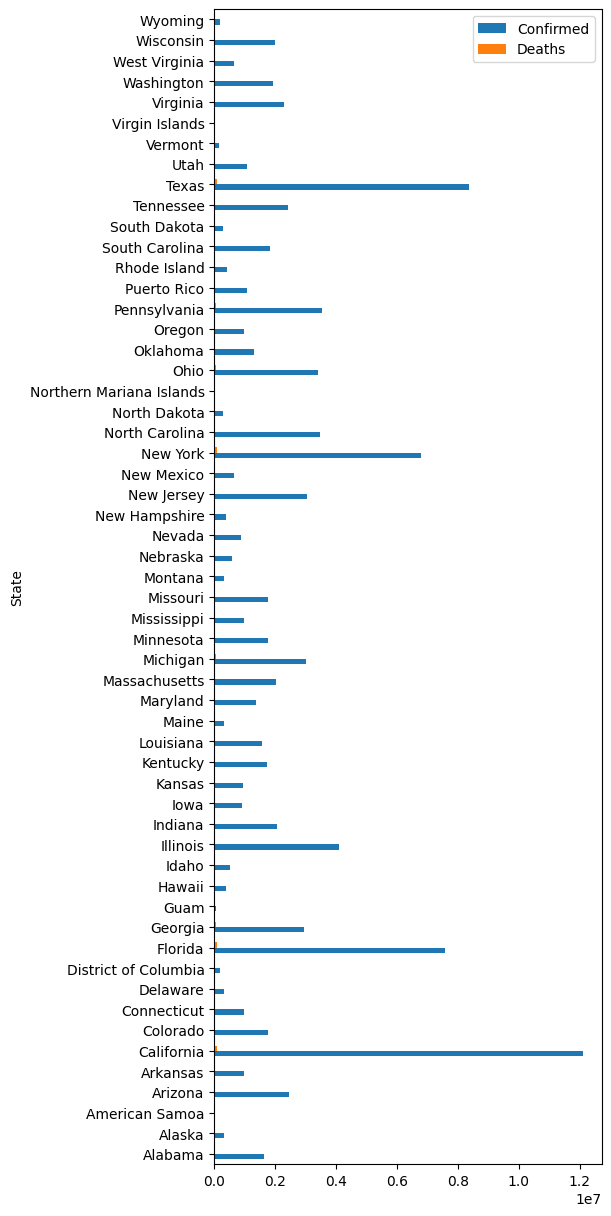

In [162]:
toPlot = usadf[['State','Confirmed','Deaths']].groupby(['State']).sum().plot(kind="barh", figsize=(5,15))